In [22]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
from networkx_viewer import Viewer


In [23]:
df = pd.read_csv('edges_qanon.csv', sep=';')
df.rename(columns=df.iloc[0], inplace=True)
df.drop(df.index[0], inplace=True)

In [58]:
print(df)

           Vertex 1        Vertex 2 Color Width Style Opacity Visibility  \
1         basile061        joebiden   NaN   NaN   NaN     NaN        NaN   
2         basile061    ericnaulleau   NaN   NaN   NaN     NaN        NaN   
3          kiermunn     carymarules   NaN   NaN   NaN     NaN        NaN   
4          kiermunn     spicygarage   NaN   NaN   NaN     NaN        NaN   
5           lmjcstt           amazi   NaN   NaN   NaN     NaN        NaN   
..              ...             ...   ...   ...   ...     ...        ...   
656       f9falcon1               q   NaN   NaN   NaN     NaN        NaN   
657     davidpuente     davidpuente   NaN   NaN   NaN     NaN        NaN   
658     davidpuente     davidpuente   NaN   NaN   NaN     NaN        NaN   
659      keynesblog     davidpuente   NaN   NaN   NaN     NaN        NaN   
660  johnvalenciacf  johnvalenciacf   NaN   NaN   NaN     NaN        NaN   

    Label Label Text Color Label Font Size  ...  \
1     NaN              NaN          

In [59]:
df_v = pd.read_csv('vertices_qanon.csv', sep=';')
df_v = df_v.drop(256)
df_v.rename(columns=df_v.iloc[0], inplace=True)
df_v.drop(df_v.index[0], inplace=True)

tweet_size = df_v['Tweets'][:563].to_list()

tweet_size2 = [int(val)/100000 for val in tweet_size]
print(df_v)

           Vertex Color Shape Size Opacity  \
1       basile061   NaN   NaN  NaN     NaN   
2        joebiden   NaN   NaN  NaN     NaN   
3    ericnaulleau   NaN   NaN  NaN     NaN   
4        kiermunn   NaN   NaN  NaN     NaN   
5     carymarules   NaN   NaN  NaN     NaN   
..            ...   ...   ...  ...     ...   
621           NaN   NaN   NaN  NaN     NaN   
622           NaN   NaN   NaN  NaN     NaN   
623           NaN   NaN   NaN  NaN     NaN   
624           NaN   NaN   NaN  NaN     NaN   
625           NaN   NaN   NaN  NaN     NaN   

                                            Image File Visibility Label  \
1    http://pbs.twimg.com/profile_images/1241401801...        NaN   NaN   
2    http://pbs.twimg.com/profile_images/1308769664...        NaN   NaN   
3    http://pbs.twimg.com/profile_images/7007419574...        NaN   NaN   
4    http://pbs.twimg.com/profile_images/4913719290...        NaN   NaN   
5    http://pbs.twimg.com/profile_images/7997855528...        NaN   NaN 

In [55]:
G = nx.Graph()
for i in range(len(df)):
    #if df.iloc[i]['Vertex 1'] != df.iloc[i]['Vertex 2']:
    G.add_edge(df.iloc[i]['Vertex 1'], df.iloc[i]['Vertex 2'])


In [57]:
closeness = nx.closeness_centrality(G)
closeness_list = list(closeness.values())
degree = nx.degree_centrality(G)
degree_list = list(degree.values())
color_list = []
betweenness = nx.betweenness_centrality(G)
betweenness_list = list(betweenness.values())
# for size in degree_list:
#     if size > 0.02:
#         color_list.append('red')
#     else:
#         color_list.append('blue')

for i in range(len(closeness_list)):
    if degree_list[i] > 0.03:
        color_list.append('red')
    elif closeness_list[i] > 0.02:
        color_list.append('green')
    else:
        color_list.append('blue')
    
        
# size_list = [val*200 for val in size_list]
# size_list = tweet_size
# print(len(size_list))
# print(len(color_list))
# print(len(tweet_size2))
# print(len(G))
# print(betweenness)

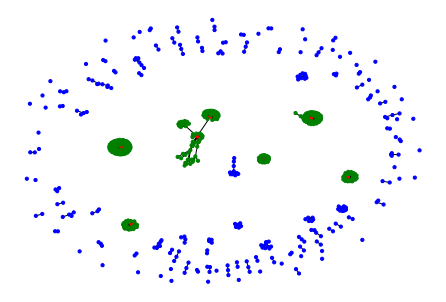

In [48]:
nx.draw(G, node_size=10, node_color=color_list)
plt.show()

In [32]:
# size_list.sort(reverse=True)

In [33]:
# print(size_list[:9])

In [34]:
sorted_size = sorted(degree.items(), key=lambda x: x[1], reverse=True)
names = [item[0] for item in sorted_size[:8]]
print(names)

['ruthmkb', 'davidpuente', 'bombshelldaily', 'rudybouma', 'mog7546', 'joebiden', 'ericnaulleau', 'stevemandolin']


In [35]:
# sorted_size = sorted(closeness.items(), key=lambda x: x[1], reverse=True)
# print(sorted_size)

In [36]:
# df.loc[(df['Vertex 1'] == 'ruthmkb') | (df['Vertex 2'] == 'ruthmkb')]

In [37]:
highest_degree = df.loc[(df['Vertex 1'].isin(names)) | (df['Vertex 2'].isin(names))]

In [38]:
highest_degree = df.loc[(df['Vertex 1'].isin(names))]

In [39]:
highest_degree

,Vertex 1,Vertex 2,Color,Width,Style,Opacity,Visibility,Label,Label Text Color,Label Font Size,...,Tweet,URLs in Tweet,Domains in Tweet,Hashtags in Tweet,Tweet Date (UTC),Twitter Page for Tweet,Latitude,Longitude,Imported ID,In-Reply-To Tweet ID
388,mog7546,mog7546,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,RT @mog7546: This is the fringiest of the frin...,NaN,NaN,qanon,2-5-2021 23:00,https://twitter.com/#!/mog7546/status/13889918...,NaN,NaN,1388991846169391107,NaN
480,stevemandolin,gopchairwoman,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,RT @angiesevers: @ScottPresler @michaelwoodtx ...,NaN,NaN,NaN,2-5-2021 14:23,https://twitter.com/#!/stevemandolin/status/13...,NaN,NaN,1388861745683308549,NaN
482,stevemandolin,gop,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,RT @angiesevers: @ScottPresler @michaelwoodtx ...,NaN,NaN,NaN,2-5-2021 14:23,https://twitter.com/#!/stevemandolin/status/13...,NaN,NaN,1388861745683308549,NaN
484,stevemandolin,michaelwoodtx,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,RT @angiesevers: @ScottPresler @michaelwoodtx ...,NaN,NaN,NaN,2-5-2021 14:23,https://twitter.com/#!/stevemandolin/status/13...,NaN,NaN,1388861745683308549,NaN
486,stevemandolin,scottpresler,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,RT @angiesevers: @ScottPresler @michaelwoodtx ...,NaN,NaN,NaN,2-5-2021 14:23,https://twitter.com/#!/stevemandolin/status/13...,NaN,NaN,1388861745683308549,NaN
487,stevemandolin,angiesevers,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,RT @angiesevers: @ScottPresler @michaelwoodtx ...,NaN,NaN,NaN,2-5-2021 14:23,https://twitter.com/#!/stevemandolin/status/13...,NaN,NaN,1388861745683308549,NaN
489,stevemandolin,bigbluewaveusa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,RT @BigBlueWaveUSA: If it has to do with Tяump...,NaN,NaN,qanon cult45,2-5-2021 21:53,https://twitter.com/#!/stevemandolin/status/13...,NaN,NaN,1388974983481679874,NaN
492,stevemandolin,kennybj52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,RT @KennyBJ52: Leading #QAnon influencer is De...,NaN,NaN,qanon craiglongley denvercolorado,3-5-2021 00:23,https://twitter.com/#!/stevemandolin/status/13...,NaN,NaN,1389012737368281090,NaN
493,stevemandolin,kennybj52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,RT @KennyBJ52: Leading #QAnon influencer is De...,NaN,NaN,qanon craiglongley denvercolorado,3-5-2021 01:13,https://twitter.com/#!/stevemandolin/status/13...,NaN,NaN,1389025315452641281,NaN
495,stevemandolin,oann,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,RT @AspiringOne: @kaylan_donahou @OANN It’s to...,NaN,NaN,NaN,3-5-2021 02:03,https://twitter.com/#!/stevemandolin/status/13...,NaN,NaN,1389037899073552386,NaN


In [41]:

print(highest_degree['Tweet'])

388    RT @mog7546: This is the fringiest of the frin...
480    RT @angiesevers: @ScottPresler @michaelwoodtx ...
482    RT @angiesevers: @ScottPresler @michaelwoodtx ...
484    RT @angiesevers: @ScottPresler @michaelwoodtx ...
486    RT @angiesevers: @ScottPresler @michaelwoodtx ...
487    RT @angiesevers: @ScottPresler @michaelwoodtx ...
489    RT @BigBlueWaveUSA: If it has to do with Tяump...
492    RT @KennyBJ52: Leading #QAnon influencer is De...
493    RT @KennyBJ52: Leading #QAnon influencer is De...
495    RT @AspiringOne: @kaylan_donahou @OANN It’s to...
497    RT @AspiringOne: @kaylan_donahou @OANN It’s to...
498    RT @AspiringOne: @kaylan_donahou @OANN It’s to...
500    RT @Jobrny: Watching the documentary "Agents o...
502    RT @ZeroPartySystem: @JerasIkehorn Hey #qanon ...
503    RT @ZeroPartySystem: @JerasIkehorn Hey #qanon ...
505    RT @V92835072: Never trust a #conspiracy theor...
507    RT @gatewayrover: @BillKristol Is that suppose...
508    RT @gatewayrover: @BillK